<a href="https://colab.research.google.com/github/nawidadkhah/Graph_Simulation/blob/main/Graph_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import numpy as np
import random

# Q2

In [ ]:
def find_n2 (n1, d1):
  temp = n1 * d1
  q = []
  for i in range(2, int(temp/2)+1):
    if temp % i == 0:
      q.append(i)

  flag = False
  n2 = 0
  d2 = 0
  while flag == False:
   n2 = random.choice(q)
   if (n2 >= d1):
    flag = True
    d2 = int(temp / n2)
  return n2, d2

In [ ]:
d1 = random.randint(1, 10)
n1 = random.randint(10, 30)
n2, d2 = find_n2(n1, d1)

# d1 = 2
# n1 = 30
# n2 = 20
# d2 = 3

print("d1 : " + str(d1),
      "\nd2 : " + str(d2),
      "\nn1 : " + str(n1),
      "\nn2 : " + str(n2)
      )

nodes_a = []
nodes_b = []
for i in range(1, n1 + 1):
  nodes_a += [i for x in range(d1)]

for i in range(n1 + 1, n1 + n2 + 1):
  nodes_b += [i for x in range(d2)]

print(len(nodes_a))
print(len(nodes_b))
print(nodes_a)
print(nodes_b)

d1 : 2 
d2 : 10 
n1 : 10 
n2 : 2
20
20
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


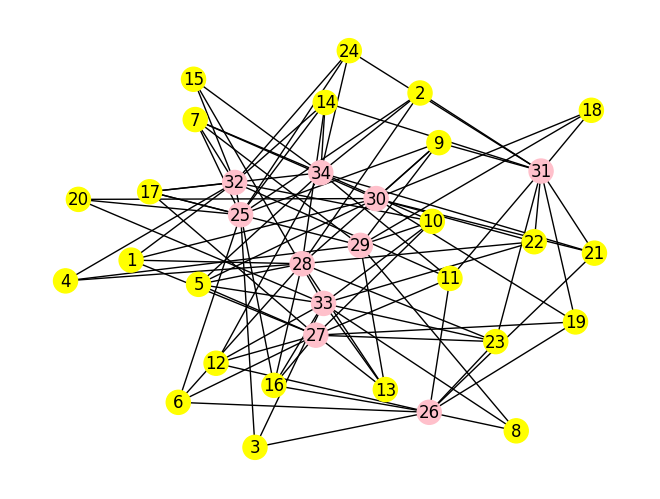

In [ ]:
nodes_check = []
check_edge = {}
G = nx.Graph()
while (len(nodes_a) != 0):

  choose_a_index = random.randint(0, len(nodes_a))
  choose_b_index = random.randint(0, len(nodes_b))

  remove_a = nodes_a.pop( choose_a_index - 1 )
  remove_b = nodes_b.pop( choose_b_index - 1 )

  if nodes_check.count(remove_a) != True:
    nodes_check.append(remove_a)
    G.add_node(remove_a,)
  if nodes_check.count(remove_b) != True:
    nodes_check.append(remove_b)
    G.add_node(remove_b)


  if remove_a not in check_edge :
    edges = check_edge.get(remove_a)
    if edges is not None:
       if remove_b not in edges :
         G.add_edge(remove_a, remove_b)
         edges.append(remove_b)
         check_edge.update({remove_a : edges})
         if check_edge.get(remove_b) != None :
            new_list = []
            new_list.append(remove_a)
            check_edge.update({remove_b : edges})
    else :
      edges = []
      edges.append(remove_b)
      G.add_edge(remove_a, remove_b)
      check_edge.update({remove_a : edges})
      if check_edge.get(remove_b) != None :
            new_list = []
            new_list.append(remove_a)
            check_edge.update({remove_b : edges})
      else:
         edges = []
         edges.append(remove_a)
         check_edge.update({remove_b : edges})

  else:
    new_list = []
    new_list.append(remove_b)
    check_edge.update({remove_a : edges})
    G.add_edge(remove_a, remove_b)


color_map = []

for node in G:
  if node < n1 +1:
        color_map.append('yellow')
  else:
        color_map.append('pink')

nx.draw(G, node_color=color_map, with_labels=True)